In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571


Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from mplh import cluster_help

fig_utils from mplh


In [6]:
os.chdir(ROOT_DIR)

## Files setup

In [7]:
indir=join(RESULTS,"mttrace")
mapq = "mapq_30"
num_reads = 200
flt3 = "CD34_Flt3L_mt_PolydT"
wt = "CD34_mt_PolydT"



flt3_indir = join(indir, flt3,"mapq_30")
wt_indir = join(indir, wt,"mapq_30")

# sc_coverage_flt3_f = join(flt3_indir,"scPileup_concat_200",flt3+"_200_all.coverage.txt.gz")
# sc_coverage_wt_f = join(wt_indir,"scPileup_concat_200",wt + "_200_all.coverage.txt.gz")

coverage_flt3_dir = join(flt3_indir,flt3+"_scPileup_200")
coverage_wt_dir = join(wt_indir,wt+"_scPileup_200")

concat_flt3_dir = join(flt3_indir,"scPileup_concat_200")
concat_wt_dir = join(wt_indir,"scPileup_concat_200")

In [8]:
outdir = join(indir, "lineage_trace/CD34_mt_polydT")
if not os.path.exists(outdir):
    os.makedirs(outdir)
outdir

'/data2/mito_lineage/data/processed/mttrace/lineage_trace/CD34_mt_polydT'

### Get CD34 with and without Flt3L, first using polydT+mt
### Create allele frequency matrix for both, but add metadata for each cell about which experiment it came from
### Cluster and look

### Additional requirements is to remove poor-quality variants of BQ- see if Erick has the code of the mixture model

In [ ]:
min_cells=100
min_reads=10
topN=500

In [9]:
print(ref_fa)
print(maxBP)
print(coverage_wt_dir)
print(concat_wt_dir)

/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta
16571
/data2/mito_lineage/data/processed/mttrace/CD34_mt_PolydT/mapq_30/CD34_mt_PolydT_scPileup_200
/data2/mito_lineage/data/processed/mttrace/CD34_mt_PolydT/mapq_30/scPileup_concat_200


In [10]:
wt_AF_by_cell, wt_af, wt_bq_df, wt_nt_df = calculate_af(coverage_wt_dir, concat_wt_dir, ref_fasta=ref_fa,AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, min_reads=min_reads)

no alt count 5331
Number of positions to keep : 465
Number of cells to keep : 500


0it [00:00, ?it/s]
0it [00:00, ?it/s]



0it [00:00, ?it/s]

0it [00:00, ?it/s]
0it [00:00, ?it/s]


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s].00it/s]
0it [00:00, ?it/s]




70it [00:00, 688.37it/s]

83it [00:00, 825.64it/s]

85it [00:00, 776.46it/s]


123it [00:00, 1224.83it/s]
129it [00:00, 1283.14it/s]A
62it [00:00, 511.27it/s]
125it [00:00, 1249.89it/s]

0it [00:00, ?it/s]0it/s]s]

78it [00:00, 769.29it/s]

101it [00:00, 1008.39it/s]

78it [00:00, 778.72it/s]




75it [00:00, 746.48it/s]
105it [00:00, 1048.48it/s]
121it [00:00, 573.60it/s]

173it [00:00, 807.25it/s] 
182it [00:00, 828.66it/s] 


191it [00:00, 986.12it/s] 




168it [00:00, 765.31it/s] 


204it [00:00, 1063.03it/s][A
122it [00:00, 632.21it/s]]
131it [00:

451it [00:00, 603.68it/s]



4it [00:03,  1.08it/s]/s]
231it [00:00, 510.79it/s]


4it [00:03,  1.06it/s]/s] [A

351it [00:00, 516.46it/s]
281it [00:00, 678.73it/s]
291it [00:00, 634.62it/s]
392it [00:00, 479.49it/s]
369it [00:00, 521.95it/s]
315it [00:00, 615.42it/s]
413it [00:00, 533.84it/s]

230it [00:00, 539.86it/s]
0it [00:00, ?it/s]10it/s]
370it [00:00, 682.64it/s]

283it [00:00, 513.40it/s]

451it [00:00, 544.08it/s]
4it [00:03,  1.05it/s]


422it [00:00, 511.62it/s]
228it [00:00, 747.78it/s]



270it [00:00, 480.74it/s]]
415it [00:00, 547.18it/s]

70it [00:00, 695.77it/s]]




451it [00:00, 609.56it/s]
4it [00:03,  1.04it/s][A
0it [00:00, ?it/s]34it/s]
378it [00:00, 508.34it/s]



0it [00:00, ?it/s]t/s]

451it [00:00, 573.29it/s]
393it [00:00, 576.51it/s]

0it [00:00, ?it/s]

289it [00:00, 699.82it/s]
358it [00:00, 566.67it/s] 

314it [00:00, 465.93it/s]



4it [00:03,  1.00it/s]
74it [00:00, 738.24it/s]

83it [00:00, 828.77it/s]]
109it [00:00, 555.36it/s]
0it [00:00, ?it/s]t/s



272it [00:00, 622.77it/s]
115it [00:00, 1148.56it/s]
451it [00:00, 470.74it/s]
251it [00:00, 800.31it/s] 

252it [00:00, 565.30it/s]
396it [00:00, 581.99it/s]
215it [00:00, 656.96it/s]


398it [00:00, 565.49it/s]
391it [00:00, 600.16it/s]




8it [00:07,  1.06it/s]

407it [00:00, 565.42it/s]
117it [00:00, 1117.38it/s]
193it [00:00, 582.85it/s]
128it [00:00, 658.68it/s]



197it [00:00, 605.85it/s]



231it [00:00, 719.71it/s]

321it [00:00, 546.52it/s]

345it [00:00, 836.27it/s]
278it [00:00, 532.83it/s]

449it [00:00, 520.23it/s]
451it [00:00, 648.99it/s]
451it [00:00, 657.75it/s]
208it [00:00, 1071.08it/s]
388it [00:00, 620.82it/s]
0it [00:00, ?it/s]t/s]


175it [00:00, 873.87it/s] 
283it [00:00, 662.29it/s]
0it [00:00, ?it/s]t/s]
451it [00:00, 591.14it/s]

238it [00:00, 535.22it/s]
210it [00:00, 457.19it/s]

0it [00:00, ?it/s]47it/s]
226it [00:00, 527.22it/s]


451it [00:00, 550.21it/s]



450it [00:00, 619.68it/s]

279it [00:00, 603.59it/s] [A

341it [00:00, 558.39it/s]
207it [00

335it [00:00, 491.21it/s]
307it [00:00, 550.77it/s]

113it [00:00, 1126.24it/s]

11it [00:10,  1.00it/s]s] 

319it [00:00, 460.87it/s]][A



345it [00:00, 448.99it/s]

11it [00:10,  1.08it/s]/s]
326it [00:00, 493.49it/s]
451it [00:00, 557.84it/s]



0it [00:00, ?it/s]94it/s]]




0it [00:00, ?it/s]

11it [00:11,  1.03it/s]
226it [00:00, 727.02it/s]]
162it [00:00, 810.10it/s] 
12it [00:11,  1.07it/s]
11it [00:11,  1.01s/it]

368it [00:00, 514.46it/s]

333it [00:00, 606.31it/s]
387it [00:00, 607.31it/s]][A

0it [00:00, ?it/s]
306it [00:00, 504.00it/s]





374it [00:00, 489.03it/s] [A




183it [00:00, 889.74it/s] 
216it [00:00, 603.72it/s]





0it [00:00, ?it/s]

0it [00:00, ?it/s]
358it [00:00, 634.74it/s]]


451it [00:00, 535.45it/s]

414it [00:00, 447.38it/s]
451it [00:00, 543.64it/s] 
300it [00:00, 708.12it/s]




12it [00:11,  1.08it/s]
236it [00:00, 723.90it/s]]

451it [00:00, 539.29it/s]





451it [00:00, 507.34it/s]

100it [00:00, 999.75it/s]
376it [00:00, 737.31it/s]A
124it [

In [11]:
print(((wt_bq_df>0).sum(axis=1)).where(lambda x: x>1).dropna().index)

Int64Index([   10,    17,    23,    39,    46,    48,    64,    73,    89,
              111,
            ...
            16382, 16383, 16386, 16387, 16456, 16457, 16459, 16460, 16496,
            16519],
           dtype='int64', length=11235)


In [12]:
print(f"Number of positions with heteroplasmy fraction above 0: {(wt_AF_by_cell>0).any(axis=0).sum()}")

Number of positions with heteroplasmy fraction above 0: 430


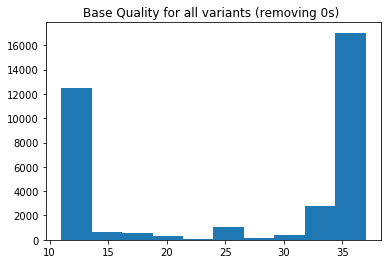

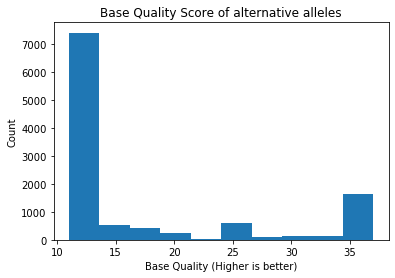

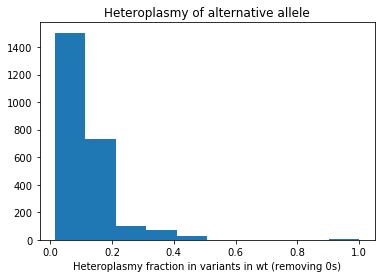

In [14]:
%matplotlib inline
f = plt.figure()
bq_vals = wt_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "wt_base_quality.png"))

plt.figure()
plt.hist(wt_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "wt_base_quality_altAllele.png"))


f = plt.figure()
af_vals = wt_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in wt (removing 0s)")
plt.savefig(join(outdir, "wt_heteroplasmy_values.png"))


# flt3

In [15]:
flt3_AF_by_cell, flt3_af, flt3_bq_df, flt3_nt_df = calculate_af(coverage_flt3_dir, concat_flt3_dir, ref_fasta=ref_fa,AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, min_reads=min_reads)

no alt count 2142
Number of positions to keep : 1243
Number of cells to keep : 500


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


0it [00:00, ?it/s]
0it [00:00, ?it/s]


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


0it [00:00, ?it/s]
0it [00:00, ?it/s]







0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]



73it [00:00, 724.25it/s]


63it [00:00, 625.41it/s]

67it [00:00, 661.96it/s]
75it [00:00, 747.13it/s]]]
80it [00:00, 795.89it/s]
80it [00:00, 792.45it/s]


75it [00:00, 749.61it/s]
71it [00:00, 705.05it/s]

62it [00:00, 619.11it/s]

85it [00:00, 846.83it/s]
87it [00:00, 865.91it/s]

81it [00:00, 804.77it/s]
74it [00:00, 734.26it/s]
52it [00:00, 519.59it/s]


81it [00:00, 808.46it/s]s]
113it [00:00, 1124.96it/s]A
113it [00:00, 1124.04it/s]
95it [00:00, 948.46it/s]][A




81it [00:00, 801.73it/s]
67it [00:00, 660.78it/s]
165it [00:00, 788.30it/s]
148it [00:00, 679.25it/s]

111it [00:00, 574.41it/s]
165it [00:00, 845.51it/s] [A
156it [00:00, 781.92it/s]


156it [00:00, 

0it [00:00, ?it/s]/it]
119it [00:00, 1179.67it/s]


282it [00:00, 957.53it/s] 
1225it [00:01, 818.03it/s]


0it [00:00, ?it/s]99it/s]]
0it [00:00, ?it/s]
1242it [00:01, 893.97it/s]

200it [00:00, 1039.24it/s]
0it [00:00, ?it/s]/it]
0it [00:00, ?it/s]

165it [00:00, 851.61it/s]




190it [00:00, 975.05it/s] 

1117it [00:01, 767.19it/s]


94it [00:00, 936.74it/s]

283it [00:00, 918.11it/s] 
176it [00:00, 912.48it/s] 

293it [00:00, 996.60it/s] 

282it [00:00, 929.32it/s] 
387it [00:00, 982.20it/s]]


116it [00:00, 1153.61it/s]
363it [00:00, 921.05it/s]


102it [00:00, 1017.42it/s]
101it [00:00, 1006.27it/s]
111it [00:00, 1107.48it/s]



111it [00:00, 1103.43it/s][A


179it [00:00, 930.03it/s] 
92it [00:00, 919.63it/s]


1195it [00:01, 763.63it/s]

271it [00:00, 907.94it/s]

176it [00:00, 895.80it/s]
261it [00:00, 866.14it/s] 

381it [00:00, 935.06it/s]


305it [00:00, 1026.00it/s]

88it [00:00, 873.61it/s]]
369it [00:00, 906.86it/s] 


461it [00:00, 936.80it/s]


184it [00:00, 943.90it/s

1242it [00:01, 885.66it/s]
0it [00:00, ?it/s]
1185it [00:01, 851.31it/s]

4it [00:06,  1.63s/it]t/s]

1242it [00:01, 845.44it/s]
98it [00:00, 975.48it/s]s]
190it [00:00, 984.18it/s] 
1242it [00:01, 850.24it/s]
0it [00:00, ?it/s].22it/s]
4it [00:06,  1.64s/it]
4it [00:06,  1.64s/it]




121it [00:00, 1200.65it/s]

103it [00:00, 996.99it/s]
0it [00:00, ?it/s].28it/s]
285it [00:00, 956.34it/s]
1242it [00:01, 839.40it/s]

260it [00:00, 884.20it/s]
1242it [00:01, 827.36it/s]


4it [00:06,  1.65s/it]
181it [00:00, 919.97it/s]]
413it [00:00, 1006.50it/s]
113it [00:00, 1122.24it/s]




223it [00:00, 1131.44it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]71it/s]]

4it [00:06,  1.64s/it]


0it [00:00, ?it/s]04it/s]
646it [00:00, 1059.19it/s]
107it [00:00, 1068.33it/s]
183it [00:00, 937.08it/s] 

1242it [00:01, 856.14it/s]
110it [00:00, 1099.86it/s]

131it [00:00, 1302.13it/s][A
1182it [00:01, 844.59it/s]
117it [00:00, 1165.39it/s]


346it [00:00, 872.32it/s]]

397it [00:00, 951.43it/s] A
248it [00:00


0it [00:00, ?it/s]
389it [00:00, 974.75it/s]]

86it [00:00, 837.34it/s]
1242it [00:01, 849.66it/s]
826it [00:00, 983.57it/s]
1242it [00:01, 864.18it/s]

1242it [00:01, 831.94it/s]


1068it [00:01, 849.15it/s]

0it [00:00, ?it/s]50it/s]
1242it [00:01, 809.02it/s]
0it [00:00, ?it/s].14it/s]
0it [00:00, ?it/s]


471it [00:00, 932.38it/s]]

1193it [00:01, 735.63it/s]
194it [00:00, 1002.64it/s]
1242it [00:01, 849.12it/s]



0it [00:00, ?it/s]/it]
708it [00:00, 985.43it/s]
6it [00:09,  1.59s/it]/s] 


100it [00:00, 999.57it/s]
121it [00:00, 1205.29it/s][A
919it [00:00, 960.99it/s]

1242it [00:01, 790.28it/s]
295it [00:00, 1004.79it/s]
6it [00:09,  1.63s/it]
0it [00:00, ?it/s]

130it [00:00, 1297.10it/s]
6it [00:09,  1.61s/it]/s] 


224it [00:00, 1137.98it/s]
0it [00:00, ?it/s]02it/s]




1242it [00:01, 828.72it/s]


122it [00:00, 1218.51it/s]

286it [00:00, 975.48it/s] [A



283it [00:00, 965.87it/s]
173it [00:00, 897.12it/s]
0it [00:00, ?it/s]01it/s]


364it [00:00, 882.57it/s] 

282it [00

188it [00:00, 968.95it/s] 
1063it [00:01, 892.90it/s]

190it [00:00, 961.36it/s]

193it [00:00, 995.54it/s] 


197it [00:00, 1010.01it/s]
1242it [00:01, 934.28it/s]
1242it [00:01, 1020.45it/s]




102it [00:00, 1014.11it/s]
471it [00:00, 934.47it/s]

8it [00:12,  1.56s/it]
0it [00:00, ?it/s].03it/s]
344it [00:00, 1153.93it/s]
1232it [00:01, 813.37it/s]
0it [00:00, ?it/s]
200it [00:00, 1036.05it/s]
1155it [00:01, 927.88it/s]

194it [00:00, 957.69it/s] 



1242it [00:01, 819.82it/s]


103it [00:00, 1024.04it/s]
8it [00:12,  1.61s/it]
280it [00:00, 952.37it/s]]
311it [00:00, 1052.41it/s]
259it [00:00, 860.93it/s]
9it [00:12,  1.40s/it]

445it [00:00, 1120.04it/s]

0it [00:00, ?it/s].42it/s]
268it [00:00, 894.87it/s] 

121it [00:00, 1200.54it/s]
547it [00:00, 872.80it/s]

349it [00:00, 860.85it/s]
1242it [00:01, 888.82it/s]
433it [00:00, 1057.36it/s]

0it [00:00, ?it/s].59it/s]


99it [00:00, 988.33it/s]
291it [00:00, 993.95it/s] 
183it [00:00, 942.28it/s] 
118it [00:00, 1173.92it/s]



12

94it [00:00, 870.43it/s]s]


1099it [00:02, 442.87it/s]




1124it [00:02, 560.90it/s]
1074it [00:02, 499.12it/s]



120it [00:00, 1197.85it/s]
463it [00:00, 521.25it/s]
762it [00:01, 451.00it/s]]

207it [00:00, 1075.21it/s]



767it [00:01, 545.35it/s]


1189it [00:02, 518.82it/s]
11it [00:18,  1.87s/it]
116it [00:00, 1157.21it/s]
0it [00:00, ?it/s]

104it [00:00, 1009.34it/s]

1182it [00:02, 553.40it/s]
1241it [00:02, 555.60it/s]
112it [00:00, 1110.70it/s]

1139it [00:02, 470.21it/s]

151it [00:00, 619.00it/s] 




227it [00:00, 453.55it/s]
1242it [00:02, 522.97it/s]




879it [00:01, 421.21it/s] 


11it [00:18,  1.89s/it]s]]

12it [00:18,  1.80s/it]/s]


135it [00:00, 600.95it/s] [A


1242it [00:02, 565.97it/s]
107it [00:00, 1050.77it/s]

169it [00:00, 852.78it/s] 
189it [00:00, 519.85it/s] 
1189it [00:02, 407.64it/s]
1114it [00:02, 462.48it/s]


11it [00:18,  1.90s/it]s]][A
1189it [00:02, 452.63it/s]



98it [00:00, 978.69it/s]s]
242it [00:00, 512.93it/s]
11it [00:18,  1.95s/it]
11

1170it [00:01, 588.08it/s]
234it [00:00, 772.21it/s]
734it [00:01, 715.47it/s]
186it [00:00, 960.28it/s] 
13it [00:23,  2.09s/it]s]



382it [00:00, 738.32it/s]

113it [00:00, 1127.82it/s]
400it [00:00, 719.16it/s] 
119it [00:00, 1181.89it/s]
174it [00:00, 854.39it/s] 
185it [00:00, 959.93it/s] 
479it [00:00, 756.85it/s]
1016it [00:01, 560.99it/s]

109it [00:00, 1082.39it/s]

155it [00:00, 753.14it/s] 
0it [00:00, ?it/s].54it/s]
1046it [00:01, 622.24it/s]
308it [00:00, 516.34it/s]




106it [00:00, 1058.53it/s]

1023it [00:01, 638.22it/s]
291it [00:00, 697.40it/s]
1186it [00:01, 690.99it/s]
438it [00:00, 651.37it/s]




211it [00:00, 657.21it/s]
472it [00:00, 719.14it/s]
381it [00:00, 745.16it/s]]





256it [00:00, 842.49it/s]
248it [00:00, 826.93it/s]]
1073it [00:01, 560.49it/s]


171it [00:00, 880.58it/s] 
1114it [00:01, 637.66it/s]

1242it [00:01, 709.64it/s]

1087it [00:01, 615.74it/s]


359it [00:00, 513.95it/s]


328it [00:00, 813.40it/s]
424it [00:00, 627.94it/s]

170it [00:00,

1242it [00:01, 804.97it/s]

1121it [00:01, 823.28it/s]

1026it [00:01, 919.42it/s]
15it [00:26,  1.93s/it]
793it [00:00, 867.10it/s]]
15it [00:26,  1.78s/it]/s]
805it [00:00, 912.56it/s]


15it [00:26,  1.78s/it]/s]

992it [00:01, 880.69it/s]]
15it [00:26,  1.93s/it]
15it [00:26,  1.78s/it]
1071it [00:01, 829.55it/s]
1242it [00:01, 810.98it/s]
906it [00:01, 945.89it/s]]
545it [00:00, 1103.81it/s]
15it [00:26,  1.97s/it]/s]

15it [00:26,  1.78s/it]
15it [00:26,  1.78s/it]




1119it [00:01, 887.07it/s]
893it [00:01, 879.31it/s]]
1242it [00:01, 805.49it/s]
15it [00:26,  1.94s/it]/s]
15it [00:26,  1.78s/it]

1033it [00:01, 1024.20it/s]
674it [00:00, 1151.94it/s]
1013it [00:01, 1112.66it/s]
988it [00:01, 919.24it/s]
1214it [00:01, 904.91it/s]
980it [00:01, 875.21it/s]
1191it [00:01, 932.03it/s]
15it [00:26,  1.92s/it]/s]
15it [00:26,  1.79s/it]


1165it [00:01, 1096.75it/s]

1142it [00:01, 1160.12it/s][A
1242it [00:01, 827.95it/s]
1082it [00:01, 913.63it/s]
1242it [00:01, 972.15it/s] 
15it

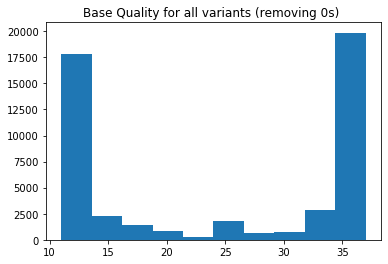

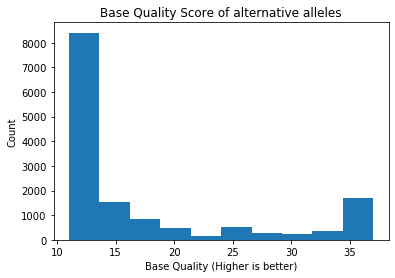

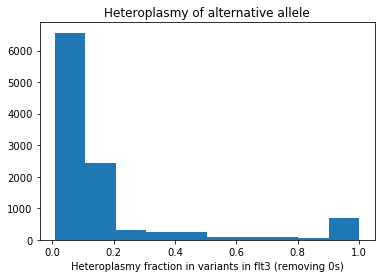

In [16]:
%matplotlib inline
f = plt.figure()
bq_vals = flt3_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "flt3_base_quality.png"))

plt.figure()
plt.hist(flt3_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "flt3_base_quality_altAllele.png"))


f = plt.figure()
af_vals = flt3_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in flt3 (removing 0s)")
plt.savefig(join(outdir, "flt3_heteroplasmy_values.png"))


## Merge the two 

In [17]:
flt3_AF_by_cell.index = flt3_AF_by_cell.index + "_flt3"
wt_AF_by_cell.index = wt_AF_by_cell.index + "_wt"


In [18]:
all_cells = pd.concat((wt_AF_by_cell,flt3_AF_by_cell) ,axis=1)


/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
all_cells_var_overlap = pd.concat((wt_AF_by_cell,flt3_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values
all_cells_var_overlap


,1673C,1674C,1677A,1678A,1680C,1681T,1682A,1683A,1684A,1685A,...,9506A,9507A,9508A,9509G,9510C,9511T,9512A,14804T,14805T,14806G
CATCAAGAGAGCTATA-1_wt,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
CTTGGCTCACATTAGC-1_wt,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
GCACATATCACATACG-1_wt,0.0,0.0,0.0,0.0,0.0000,0.058824,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
ACACTGAAGAAAGTGG-1_wt,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
GGGACCTGTCTCACCT-1_wt,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCACGAAGTAAATACG-1_flt3,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
CTACGTCCAGCTGTAT-1_flt3,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
ACTGAGTAGCCATCGC-1_flt3,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667
GCCTCTAAGGTGCTTT-1_flt3,0.0,0.0,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


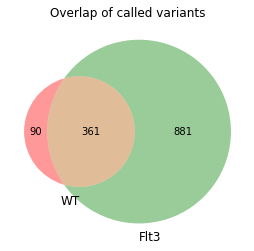

In [20]:
%matplotlib inline
venn2([set(wt_AF_by_cell.columns.values),set(flt3_AF_by_cell.columns.values)],set_labels=["WT","Flt3"])
plt.title("Overlap of called variants")
plt.savefig(join(outdir,"overlap_variants_with_without_ligand.png"))

## Plot the lineage tracing 

### With only the overlapping variants

In [21]:
all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

In [22]:
pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]})

,Sample
CTGATAGTCCTCAATT-1_flt3,Flt3
TCTTTCCAGTGGTAAT-1_flt3,Flt3
GCTGCTTAGATGTAAC-1_flt3,Flt3
ACATCAGCACCAGTTA-1_flt3,Flt3
CAACCAAAGATGGCGT-1_flt3,Flt3
...,...
TCACGAAGTAAATACG-1_flt3,Flt3
CTACGTCCAGCTGTAT-1_flt3,Flt3
ACTGAGTAGCCATCGC-1_flt3,Flt3
GCCTCTAAGGTGCTTT-1_flt3,Flt3


In [23]:

row_meta = pd.concat((pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= wt_AF_by_cell.index, data={"Sample":["wt"]*wt_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells_var_overlap.index]
row_meta

,Sample
CATCAAGAGAGCTATA-1_wt,wt
CTTGGCTCACATTAGC-1_wt,wt
GCACATATCACATACG-1_wt,wt
ACACTGAAGAAAGTGG-1_wt,wt
GGGACCTGTCTCACCT-1_wt,wt
...,...
TCACGAAGTAAATACG-1_flt3,Flt3
CTACGTCCAGCTGTAT-1_flt3,Flt3
ACTGAGTAGCCATCGC-1_flt3,Flt3
GCCTCTAAGGTGCTTT-1_flt3,Flt3


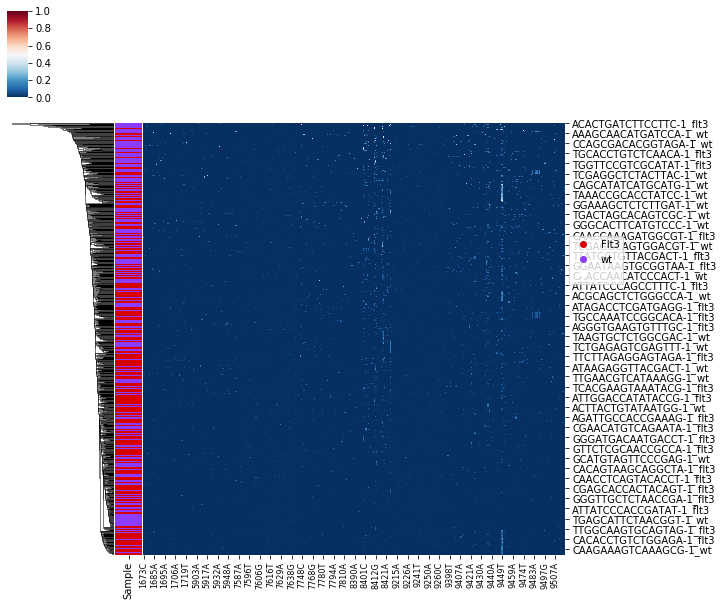

In [24]:
%matplotlib inline
cluster_help.plot_cluster(df=all_cells_var_overlap, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_OnlyoverlapVariants.png"))

## Plot number of overlapping positions from Flt3 and without

### With all variants

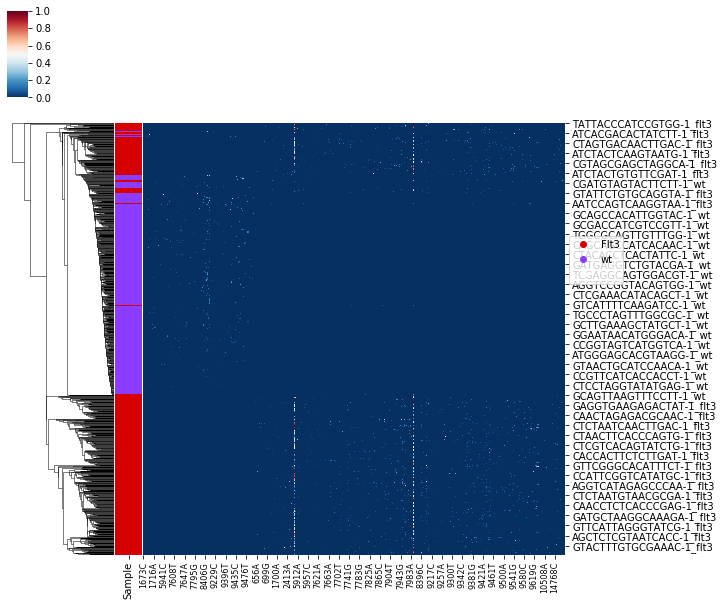

In [27]:
all_cells = all_cells.fillna(0)
all_cells = all_cells.drop((all_cells==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells = all_cells.drop((all_cells==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

# row_meta = pd.concat((pd.DataFrame(index=flt3_cell, data={"Sample":["Flt3"]*flt3_cell.shape[0]}),
#            pd.DataFrame(index=wt_cell, data={"Sample":["wt"]*wt_cell.shape[0]})))
# row_meta = row_meta.loc[all_cells.index]

row_meta = pd.concat((pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= wt_AF_by_cell.index, data={"Sample":["wt"]*wt_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells.index]
row_meta


g = cluster_help.plot_cluster(df=all_cells, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_AllVariants.png"))

## Clustering

In [39]:
import numpy as np

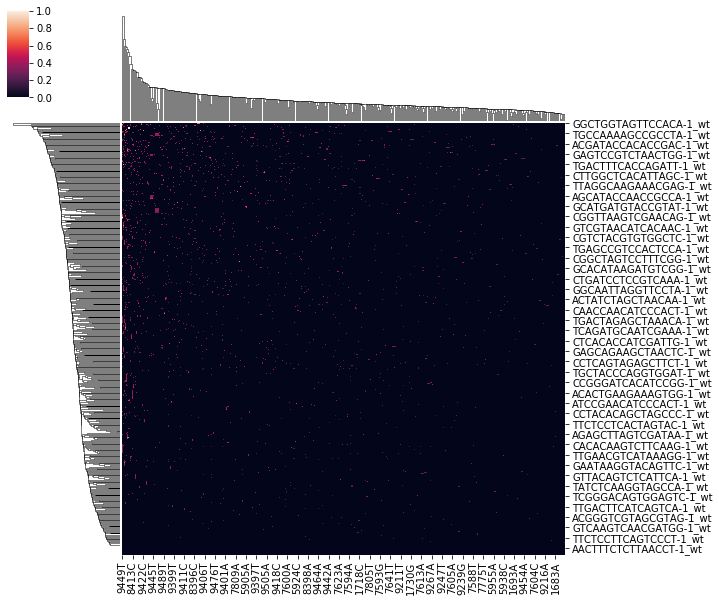

In [40]:
wt_AF_by_cell = wt_AF_by_cell.loc[:,(wt_AF_by_cell>0).any(axis=0)]
sns.clustermap(np.sqrt(wt_AF_by_cell), )

## Just using CD34 with no Flt3L

### Here we compare the rest of sequencing techniques done and see if we see the same variants, this ensuring the differences are consistent across the techniques and not technical noise.

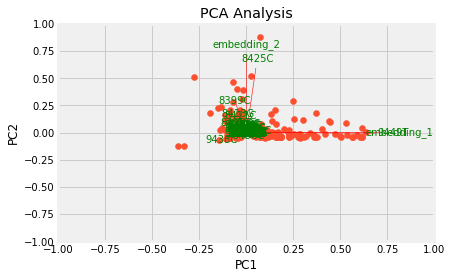

feat 0
0 0
feat 1
0 0
feat 2
1 0
feat 3
1 0
feat 4
2 0
feat 5
2 0
feat 6
3 0
feat 7
3 0
feat 8
4 0
feat 9
4 0


,1673C,1674C,1676C,1677A,1678A,1679G,1680C,1681T,1682A,1683A,...,9507A,9508A,9509G,9511T,9512A,14804T,14805T,14806G,embedding_1,embedding_2
CGAACATGTAGCAAAT-1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.046268,0.008761
TTAGGCAAGAAACGAG-1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,-0.040676,-0.043244
CACCTTGAGTTGAGAT-1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.040455,-0.047050
TTCTCAACATAGGATA-1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.039860,-0.046532
ACTGCTCCACGGCCAT-1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.016707,0.504297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CACAGTACACATGACT-1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.045654,-0.043038
CTTGGCTCATGTAGTC-1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.040113,-0.046765
CGCTGGATCTTCGGTC-1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.302745,-0.030170
GGAAAGCTCTCTTGAT-1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.1,0.0,0.0,-0.055073,-0.016746


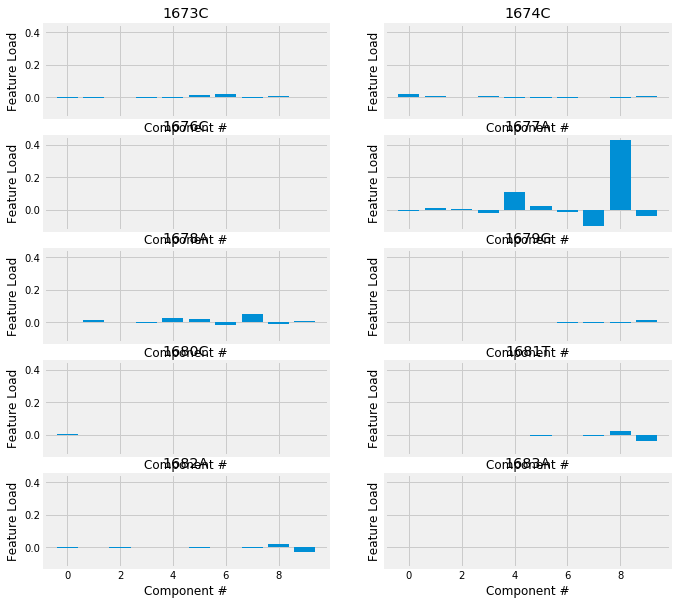

In [14]:
from src.utils import construct_pca
%matplotlib inline
construct_pca(wt_AF_by_cell)

In [19]:
from sklearn.decomposition import PCA

import numpy as np

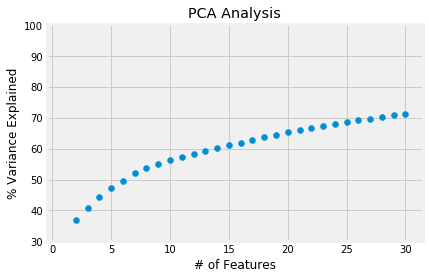

In [22]:
def construct_pca(data):
    p = PCA(n_components=30)
    p.fit(data)
    embedding = p.transform(data)
    variance = p.explained_variance_ratio_  # calculate variance ratios
    var = np.cumsum(
        np.round(p.explained_variance_ratio_, decimals=3) * 100)
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Features')
    plt.title('PCA Analysis')
    plt.ylim(30, 100.5)
    plt.scatter(x=np.arange(1, len(var) + 1), y=var)

    data["embedding_1"] = embedding[:, 0]
    data["embedding_2"] = embedding[:, 1]
    return data, p


data, p = construct_pca(wt_AF_by_cell)


(4, 7)
feat 0
0 0
feat 1
0 0
feat 2
1 0
feat 3
1 0
feat 4
2 0
feat 5
2 0
feat 6
3 0


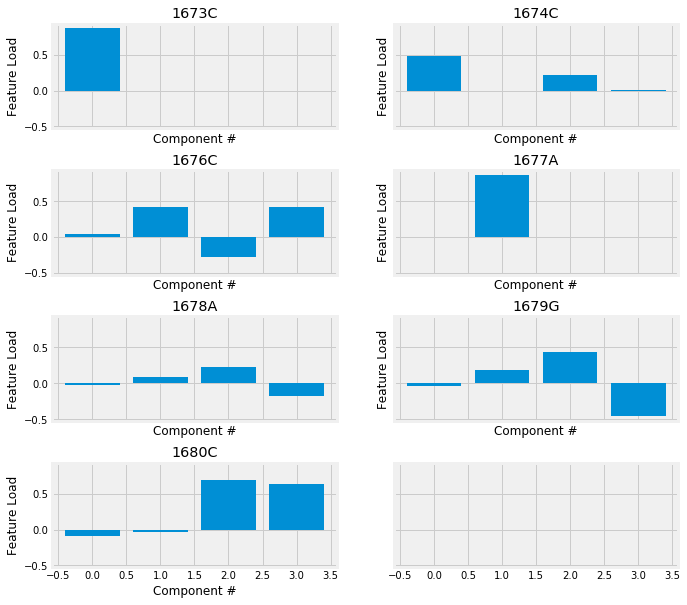

In [94]:
top_comp = 3
num_feat_per = 3

num_comp = 4
inds_to_keep = set()
for i in range(top_comp):
    inds_to_keep = inds_to_keep.union(set((p.components_[i,:]).argsort()[::-1][:num_feat_per]))
    
inds_to_keep = list(inds_to_keep)

p_comp = p.components_[:num_comp, inds_to_keep]
#Sort by top component
p_comp = p_comp[:, p_comp[0,:].argsort()[::-1]]
print(p_comp.shape)

f, ax = plt.subplots(nrows=int(np.ceil(p_comp.shape[1] / 2)), ncols=2, squeeze=True,
                     figsize=(10, 10), sharex='all', sharey='all')

for feat in range(p_comp.shape[1]):
    if feat == 0:
        ax[0, 0].bar(x=np.arange(p_comp.shape[0]),
                     height=p_comp[:,feat])
        ax[0, 0].set_title(data.columns.values[feat])
        ax[0, 0].set_xlabel("Component #")
        ax[0, 0].set_ylabel("Feature Load")
    elif int(feat/2)==ax.shape[0]:
        continue
    else:
        ax[int(feat / 2), feat % 2].bar(
            x=np.arange(p_comp.shape[0]),
            height=p_comp[:,feat])
        ax[int(feat / 2), feat % 2].set_title(
            data.columns.values[feat])
        ax[int(feat / 2), feat % 2].set_xlabel("Component #")
        ax[int(feat / 2), feat % 2].set_ylabel("Feature Load")
        #ax[int(feat / 2), feat % 2].set_xticklabels()
        
    print('feat', feat)
    print(int(feat / 2), feat % 1)
    
plt.subplots_adjust(hspace=0.4)
    # plt.legend()
#helper_save("PCloadings")

#return data

## Correlate heteroplasmy enough with 1st PC loading


In [ ]:
from skler